## Luca Wolffenbüttel Bohnenberger e Louise Zanol Northfleet 


In [44]:
import pandas as pd 
import matplotlib.pyplot as plt

In [45]:
df_treino = pd.read_csv("treino_1.csv")
df_treino.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,195830,2282442,47,4,single,rented,yes,Petroleum_Engineer,Raipur,Chhattisgarh,4,13,1
1,43165,3217258,23,12,single,rented,yes,Petroleum_Engineer,Hospet,Karnataka,8,10,0
2,14308,5726991,78,8,single,rented,no,Scientist,Kamarhati,West_Bengal,8,10,0
3,166608,9601253,51,15,single,rented,no,Politician,Ichalkaranji,Maharashtra,10,11,0
4,31875,6915072,26,3,single,rented,no,Chemical_engineer,Howrah,West_Bengal,3,12,0


## Análise Exploratória

In [46]:
df_treino

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,195830,2282442,47,4,single,rented,yes,Petroleum_Engineer,Raipur,Chhattisgarh,4,13,1
1,43165,3217258,23,12,single,rented,yes,Petroleum_Engineer,Hospet,Karnataka,8,10,0
2,14308,5726991,78,8,single,rented,no,Scientist,Kamarhati,West_Bengal,8,10,0
3,166608,9601253,51,15,single,rented,no,Politician,Ichalkaranji,Maharashtra,10,11,0
4,31875,6915072,26,3,single,rented,no,Chemical_engineer,Howrah,West_Bengal,3,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74791,222917,1036106,52,10,single,rented,yes,Civil_engineer,Srinagar,Jammu_and_Kashmir,3,13,0
74792,54810,4556669,50,2,single,rented,yes,Hotel_Manager,Khammam,Telangana,2,13,0
74793,35656,7212880,21,17,single,rented,no,Biomedical_Engineer,Guna,Madhya_Pradesh,13,12,1
74794,120153,3142984,22,13,single,rented,no,Chef,Haridwar,Uttarakhand,10,12,1


In [47]:
df_treino.describe().round(2) # das variaveis numericas nao parecem ter muitos outliers 

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,74796.00,74796.00,74796.00,74796.00,74796.00,74796.00,74796.00
mean,127268.67,4987836.17,49.67,9.96,6.29,11.99,0.33
std,74991.86,2886729.62,17.15,6.03,3.67,1.40,0.47
min,2.00,10310.00,21.00,0.00,0.00,10.00,0.00
25%,61518.00,2472911.50,34.00,5.00,3.00,11.00,0.00
50%,127120.00,4990273.00,50.00,10.00,6.00,12.00,0.00
75%,195114.75,7488205.00,65.00,15.00,9.00,13.00,1.00
max,251998.00,9999180.00,79.00,20.00,14.00,14.00,1.00


In [48]:
df_treino.info()
# nos temos 7 variaveis numericas e 6 categoricas 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74796 entries, 0 to 74795
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 74796 non-null  int64 
 1   Income             74796 non-null  int64 
 2   Age                74796 non-null  int64 
 3   Experience         74796 non-null  int64 
 4   Married/Single     74796 non-null  object
 5   House_Ownership    74796 non-null  object
 6   Car_Ownership      74796 non-null  object
 7   Profession         74796 non-null  object
 8   CITY               74796 non-null  object
 9   STATE              74796 non-null  object
 10  CURRENT_JOB_YRS    74796 non-null  int64 
 11  CURRENT_HOUSE_YRS  74796 non-null  int64 
 12  Risk_Flag          74796 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 7.4+ MB


In [49]:
df_treino.head(3)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,195830,2282442,47,4,single,rented,yes,Petroleum_Engineer,Raipur,Chhattisgarh,4,13,1
1,43165,3217258,23,12,single,rented,yes,Petroleum_Engineer,Hospet,Karnataka,8,10,0
2,14308,5726991,78,8,single,rented,no,Scientist,Kamarhati,West_Bengal,8,10,0


Nesse data frame nos temos 74796 linhas e 13 colunas  

In [50]:
df_treino.shape
# (74796, 13)

(74796, 13)

### Temos 2 variaveis binarias **Car_Ownership e Married/Single** 

que estao em represendados como yes(sim), no(nao) e merried (casado) e single (solteiro)

Married/Single 
    0 --> 67458 linhas 
    1 --> 7338 linhas 

Car_Ownership
    no --> 52693 linhas 
    yes --> 22103 linhas 

In [51]:
df_treino["Married/Single"].value_counts()

Married/Single
single     67458
married     7338
Name: count, dtype: int64

In [52]:
df_treino["Car_Ownership"].value_counts()

Car_Ownership
no     52693
yes    22103
Name: count, dtype: int64

### Temos 4 variaveis **nao binarias** com 3 ou mais categorias, essas sao:

- House_Ownership --> 3 tipos 
- Profession --> 51 tipos 
- CITY --> 317 tipos
- STATE --> 29 tipos 

In [53]:
df_treino["House_Ownership"].value_counts()

House_Ownership
rented          69164
owned            3605
norent_noown     2027
Name: count, dtype: int64

In [54]:
df_treino["Profession"].str.strip().str.lower().value_counts() # checando se precisa normalizar os dados (nao precisa)
df_treino["Profession"].nunique()

51

In [55]:
df_treino["CITY"].nunique()

317

In [56]:
df_treino["STATE"].nunique()

29

### Qualidade dos dados 

Nao temos nenhum dado faltando ou duplicado

In [57]:
# Checa valores faltantes 
na = df_treino.isna().mean().sort_values(ascending=False)
na 

Id                   0.0
Income               0.0
Age                  0.0
Experience           0.0
Married/Single       0.0
House_Ownership      0.0
Car_Ownership        0.0
Profession           0.0
CITY                 0.0
STATE                0.0
CURRENT_JOB_YRS      0.0
CURRENT_HOUSE_YRS    0.0
Risk_Flag            0.0
dtype: float64

In [58]:
# Checa Duplicadas 
dup = df_treino.duplicated().sum()
dup

0

In [59]:
# Valores únicos por coluna
card = df_treino.nunique().sort_values(ascending=False)
card

Id                   74796
Income               18405
CITY                   317
Age                     59
Profession              51
STATE                   29
Experience              21
CURRENT_JOB_YRS         15
CURRENT_HOUSE_YRS        5
House_Ownership          3
Married/Single           2
Car_Ownership            2
Risk_Flag                2
dtype: int64

### Estatisticas Descritivas 

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, StrMethodFormatter

In [61]:
df_treino[["Income", "Age", "Experience", "CURRENT_JOB_YRS", "CURRENT_HOUSE_YRS", "Risk_Flag"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Income,74796.0,4.987836e+06,2.886730e+06,10310.0,2472911.5,4990273.0,7488205.0,9999180.0
Age,74796.0,4.966915e+01,1.714527e+01,21.0,34.0,50.0,65.0,79.0
Experience,74796.0,9.964878e+00,6.030755e+00,0.0,5.0,10.0,15.0,20.0
CURRENT_JOB_YRS,74796.0,6.293639e+00,3.671066e+00,0.0,3.0,6.0,9.0,14.0
CURRENT_HOUSE_YRS,74796.0,1.198913e+01,1.399303e+00,10.0,11.0,12.0,13.0,14.0
Risk_Flag,74796.0,3.315151e-01,4.707609e-01,0.0,0.0,0.0,1.0,1.0


##### Distribuicoes das features 

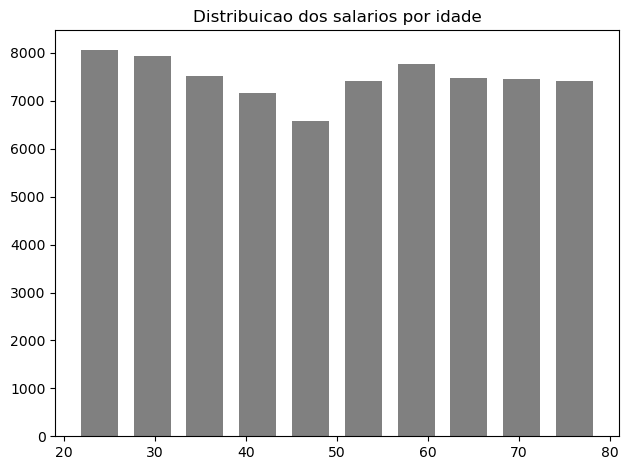

In [62]:
plt.title("Distribuicao dos salarios por idade")
plt.hist( df_treino["Age"], bins=10, color='grey', rwidth= 0.7, label=None, stacked=False, data=None)
plt.tight_layout()
plt.show()

C:\Users\Luca\AppData\Local\Temp\ipykernel_29080\1197935753.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CURRENT_HOUSE_YRS', y='Income', data=df_treino, palette='rocket')


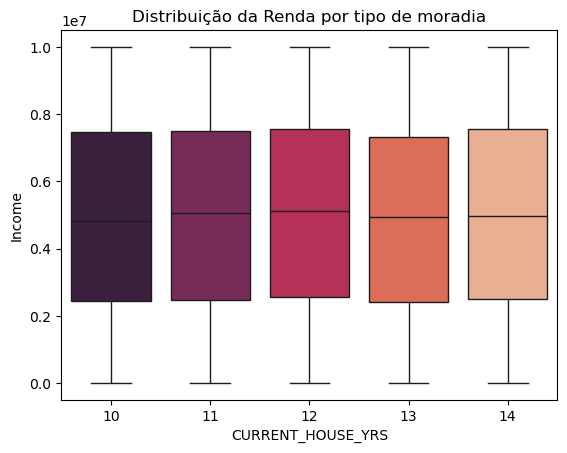

In [63]:
num_df = df_treino[["CURRENT_HOUSE_YRS", "Income"]]
sns.boxplot(x='CURRENT_HOUSE_YRS', y='Income', data=df_treino, palette='rocket')
plt.title("Distribuição da Renda por tipo de moradia")
plt.show()

C:\Users\Luca\AppData\Local\Temp\ipykernel_29080\1021527691.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CURRENT_JOB_YRS', y='Income', data=df_treino, palette='rocket')


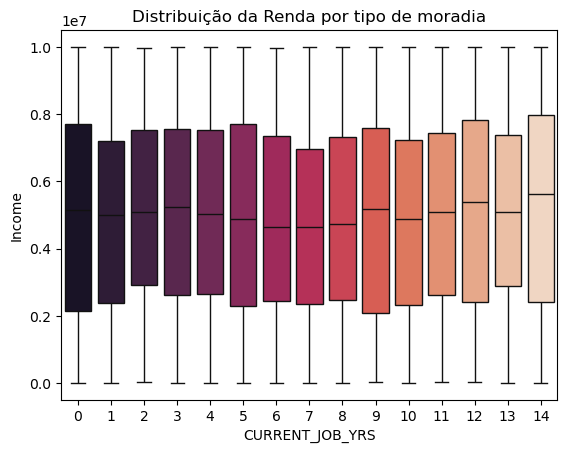

In [64]:
num_df = df_treino[["CURRENT_JOB_YRS", "Income"]]
sns.boxplot(x='CURRENT_JOB_YRS', y='Income', data=df_treino, palette='rocket')
plt.title("Distribuição da Renda por tipo de moradia")
plt.show()

C:\Users\Luca\AppData\Local\Temp\ipykernel_29080\3103262817.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='House_Ownership', y='Income', data=df_treino, palette='rocket')


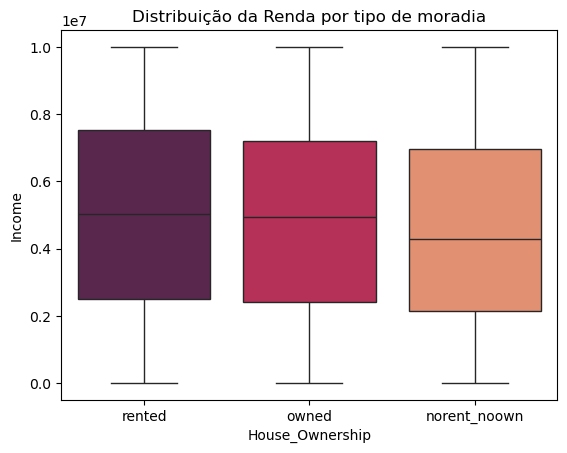

In [65]:
num_df = df_treino[["House_Ownership", "Age"]]
sns.boxplot(x='House_Ownership', y='Income', data=df_treino, palette='rocket')
plt.title("Distribuição da Renda por tipo de moradia")
plt.show()

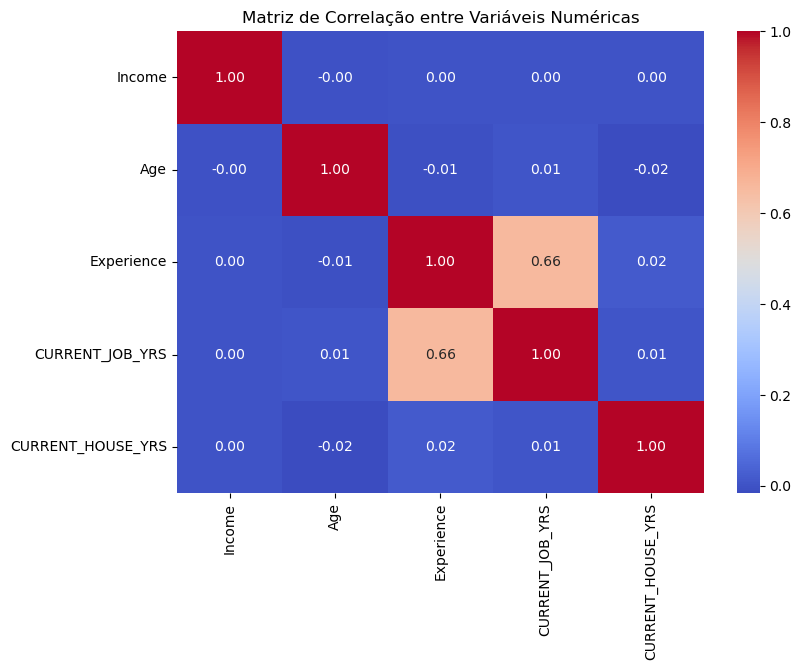

In [66]:
num_df = df_treino[["Income", "Age", "Experience", "CURRENT_JOB_YRS", "CURRENT_HOUSE_YRS"]]
correlacoes = num_df.corr()
plt.figure(figsize=(8.5, 6))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.show()

## Tratamento dos Dados / Criação da Pipeline

Dados Binarios:

In [67]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np


In [68]:
df_treino = pd.read_csv("treino_1.csv")
df_treino.drop("Id", inplace=True, axis=1)

import pandas as pd
import numpy as np

X = df_treino.drop("Risk_Flag", axis=1)
y = df_treino["Risk_Flag"]

df_test = pd.read_csv("teste.csv")

df_test.drop("Id", axis=1, inplace=True)

X_test = df_test.drop("Risk_Flag", axis=1)
y_test = df_test["Risk_Flag"]

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, stratify=y)

In [69]:
df_treino

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,2282442,47,4,single,rented,yes,Petroleum_Engineer,Raipur,Chhattisgarh,4,13,1
1,3217258,23,12,single,rented,yes,Petroleum_Engineer,Hospet,Karnataka,8,10,0
2,5726991,78,8,single,rented,no,Scientist,Kamarhati,West_Bengal,8,10,0
3,9601253,51,15,single,rented,no,Politician,Ichalkaranji,Maharashtra,10,11,0
4,6915072,26,3,single,rented,no,Chemical_engineer,Howrah,West_Bengal,3,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...
74791,1036106,52,10,single,rented,yes,Civil_engineer,Srinagar,Jammu_and_Kashmir,3,13,0
74792,4556669,50,2,single,rented,yes,Hotel_Manager,Khammam,Telangana,2,13,0
74793,7212880,21,17,single,rented,no,Biomedical_Engineer,Guna,Madhya_Pradesh,13,12,1
74794,3142984,22,13,single,rented,no,Chef,Haridwar,Uttarakhand,10,12,1


In [70]:
bumblebee = ColumnTransformer([
    ("binario", OneHotEncoder(drop= "if_binary"), ["Married/Single", "Car_Ownership"]),
    ("mult", OneHotEncoder(drop= "first"), ["House_Ownership", "STATE", "Profession", "CITY"])
    ],remainder="passthrough")

In [71]:
mestre_splinter = Pipeline([
    ("pre-processamento", bumblebee), 
    ("modelo", RandomForestClassifier())
    ])

In [72]:
mestre_splinter.fit(X_train, y_train)

,steps,"[('pre-processamento', ...), ('modelo', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('binario', ...), ('mult', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Como podemos ver a baixo, ele tem uma precisão absoluta no conjunto de treino, porem não é muito bom no conjunto de validação, isso significa que o modelo está com um certo grau de overfitting

In [73]:
y_pred = mestre_splinter.predict(X_valid)
y_pred1 = mestre_splinter.predict(X_train)
print("Treino: Acuracia: ",accuracy_score(y_pred1, y_train), "--- F1: ", f1_score(y_pred1, y_train))
print("Validação: Acuracia: ",accuracy_score(y_pred, y_valid), "--- F1: ", f1_score(y_pred, y_valid))

Treino: Acuracia:  0.944097199010629 --- F1:  0.921752555615336
Validação: Acuracia:  0.861096256684492 --- F1:  0.7818143637127257


# Random florest Classifier 

## Busca por bons hiperparametros

In [74]:
aurelio = {
    "modelo__n_estimators": [32,35,36],
    "modelo__max_depth": [154,155,156],
    "modelo__min_samples_leaf": [1]

}
    # max_depth: Int | None = None,
    # min_samples_split: float = 2,
    # min_samples_leaf: float = 1,
    # min_weight_fraction_leaf: Float = 0,
    # max_features: float | Literal['sqrt', 'log2'] = "sqrt",
    # max_leaf_nodes: Int | None = None,
    # min_impurity_decrease: Float = 0,

In [75]:
X_train_val = pd.concat([X_train, X_valid], axis=0)
y_train_val = pd.concat([y_train, y_valid], axis=0)

test_fold = np.concatenate([
    -1 * np.ones(len(X_train), dtype=int),
     0 * np.ones(len(X_valid), dtype=int)
])

ps = PredefinedSplit(test_fold)

In [76]:
pedro_alvares_cabral = GridSearchCV(mestre_splinter, 
                                    param_grid=aurelio, scoring=["accuracy", "f1_micro"], refit='f1_micro', n_jobs= -1, cv=ps)

In [77]:
pedro_alvares_cabral.fit(X_train_val, y_train_val)

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'modelo__max_depth': [154, 155, ...], 'modelo__min_samples_leaf': [1], 'modelo__n_estimators': [32, 35, ...]}"
,scoring,"['accuracy', 'f1_micro']"
,n_jobs,-1
,refit,'f1_micro'
,cv,"PredefinedSpl......, 0, 0]))"
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('binario', ...), ('mult', ...)]"


In [78]:
pedro_alvares_cabral.best_params_

{'modelo__max_depth': 156,
 'modelo__min_samples_leaf': 1,
 'modelo__n_estimators': 36}

In [79]:
final_model = mestre_splinter.set_params(**pedro_alvares_cabral.best_params_)
final_model.fit(X_train, y_train)  # apenas treino, validação fica como teste


,steps,"[('pre-processamento', ...), ('modelo', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('binario', ...), ('mult', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Fizemos uma busca extensiva por melhores parametros, chegando no resultado abaixo, entretanto, a diferença de resultado foi muito baixo em comparação a simplesmente usar o modelo padrão do random forest, e paramos com um modelo muito profundo, então iremos optar por usar os hiperparametros padrões, pois eles são mais rapidos para o treinamento e inferencia

In [80]:
y_pred = mestre_splinter.predict(X_valid)
y_pred1 = mestre_splinter.predict(X_train)
y_pred2 = pedro_alvares_cabral.best_estimator_.predict(X_test)
print("Treino: Acuracia: ",accuracy_score(y_pred1, y_train), "--- F1: ", f1_score(y_pred1, y_train))
print("Validação: Acuracia: ",accuracy_score(y_pred, y_valid), "--- F1: ", f1_score(y_pred, y_valid))
print("Treino: Acuracia: ",accuracy_score(y_pred2, y_test), "--- F1: ", f1_score(y_pred2, y_test))

Treino: Acuracia:  0.9439635002339729 --- F1:  0.9215360494231625
Validação: Acuracia:  0.8609625668449198 --- F1:  0.7831978319783198
Treino: Acuracia:  0.8420161290322581 --- F1:  0.8308728308728309


## Visualização do modelo com melhores parametros

In [81]:
final_model = mestre_splinter

final_model.fit(X,y)

,steps,"[('pre-processamento', ...), ('modelo', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('binario', ...), ('mult', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [82]:
# Acesse o passo 'modelo' do pipeline e, em seguida, o atributo feature_importances_
importances = final_model['modelo'].feature_importances_

print(importances)

[0.00843702 0.01282005 0.00329639 0.00561992 0.00342118 0.00619974
 0.00064313 0.00288355 0.00247274 0.00499491 0.00408445 0.00080899
 0.00100302 0.00424854 0.00449825 0.00339285 0.00491711 0.00665226
 0.00116039 0.00078254 0.00291605 0.00124526 0.0024654  0.00371342
 0.00045197 0.00547685 0.00420636 0.00101666 0.00716748 0.00099743
 0.00149103 0.00671664 0.00395541 0.00381661 0.00415101 0.00411448
 0.00389828 0.00443933 0.00446841 0.0037515  0.00398129 0.00366417
 0.00391174 0.00425122 0.00425463 0.00404421 0.00410591 0.00389504
 0.00396536 0.0035281  0.00412858 0.00393022 0.00384017 0.0042303
 0.00387913 0.00395442 0.00385881 0.00407125 0.004072   0.00420329
 0.00398486 0.00389756 0.00375798 0.00404031 0.00417698 0.00421536
 0.00363758 0.00281559 0.00449185 0.00431493 0.00381139 0.00409564
 0.00482261 0.00447137 0.00466585 0.00418077 0.00410851 0.00437982
 0.00387673 0.00430597 0.00334713 0.00358546 0.00087653 0.00116159
 0.00135071 0.00071149 0.00071709 0.00104067 0.00098837 0.00120

In [83]:
import pandas as pd


transformed_feature_names = final_model['pre-processamento'].get_feature_names_out()


# 2. Agora, crie a Série com os 404 scores e os 404 nomes corretos.
feature_importances = pd.Series(importances, index=transformed_feature_names)

# 3. O resto do seu código para ordenar e exibir funcionará perfeitamente!
feature_importances.sort_values(ascending=False, inplace=True)

print("As 15 features mais importantes encontradas pelo modelo:")
print(feature_importances.head(15))

As 15 features mais importantes encontradas pelo modelo:
remainder__Income                 0.099049
remainder__Age                    0.083758
remainder__Experience             0.060258
remainder__CURRENT_JOB_YRS        0.055875
remainder__CURRENT_HOUSE_YRS      0.046504
binario__Car_Ownership_yes        0.012820
binario__Married/Single_single    0.008437
mult__STATE_Uttar_Pradesh         0.007167
mult__STATE_West_Bengal           0.006717
mult__STATE_Maharashtra           0.006652
mult__STATE_Bihar                 0.006200
mult__House_Ownership_rented      0.005620
mult__STATE_Tamil_Nadu            0.005477
mult__STATE_Gujarat               0.004995
mult__STATE_Madhya_Pradesh        0.004917
dtype: float64


In [84]:
X_train_simple = X[["Income", "Age"]]
X_test_simple = X_test[["Income", "Age"]]

In [85]:
simple_model = RandomForestClassifier()
simple_model.fit(X_train_simple, y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


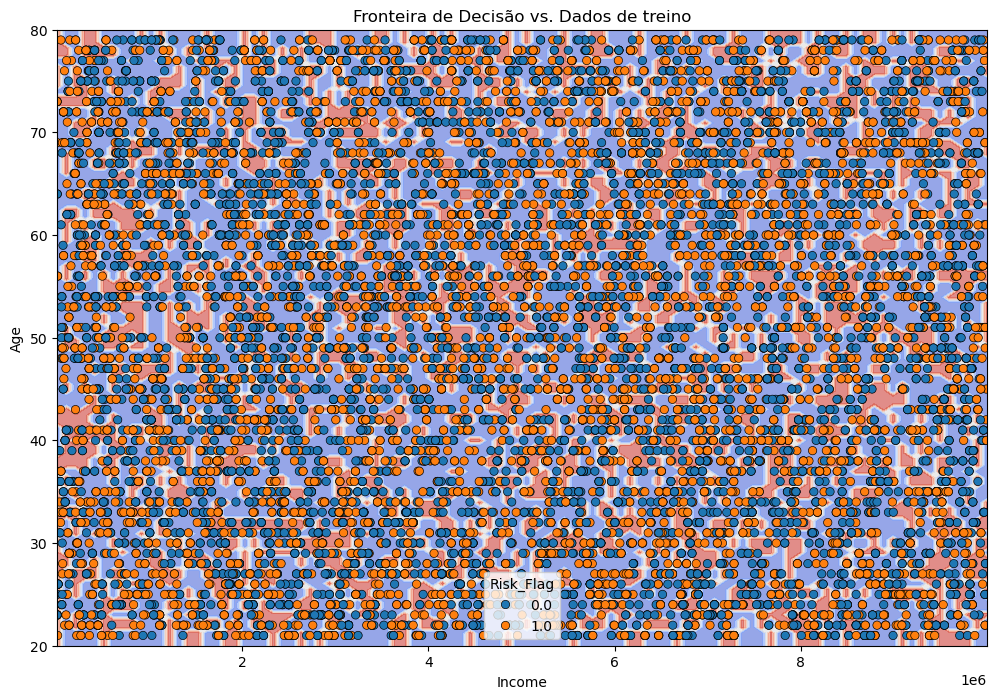

In [86]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.title("Fronteira de Decisão vs. Dados de treino")

DecisionBoundaryDisplay.from_estimator(
    simple_model,
    X[["Income", "Age"]], 
    ax=ax,
    response_method="predict",
    cmap="coolwarm", alpha=0.6,
    xlabel="Income", ylabel="Age"
)
sns.scatterplot(
    x=X["Income"], y=X["Age"],
    hue=y_test, ax=ax, edgecolor="k"
)
plt.show()

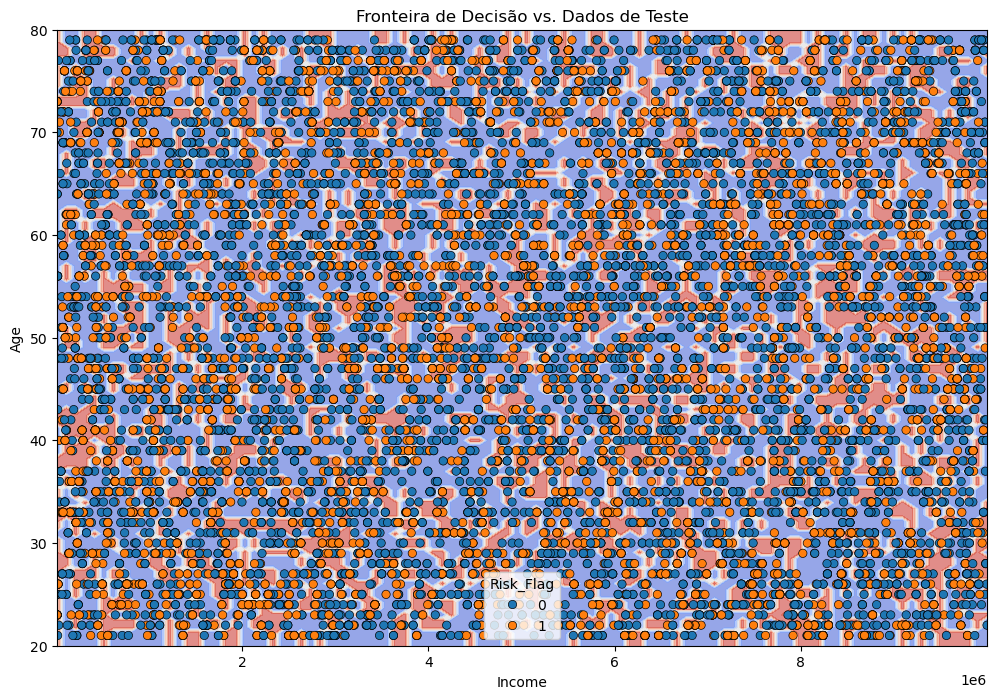

In [87]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.title("Fronteira de Decisão vs. Dados de Teste")

DecisionBoundaryDisplay.from_estimator(
    simple_model,
    X_test[["Income", "Age"]], 
    ax=ax,
    response_method="predict",
    cmap="coolwarm", alpha=0.6,
    xlabel="Income", ylabel="Age"
)
sns.scatterplot(
    x=X_test["Income"], y=X_test["Age"],
    hue=y_test, ax=ax, edgecolor="k"
)
plt.show()

# XGBoost 

## Buscando bons hiperparametros

In [88]:
mestre_yoda = Pipeline([
    ("pre", bumblebee),
    ("modelo", XGBClassifier())
])

In [89]:
mestre_yoda.fit(X_train, y_train)
y_pred = mestre_yoda.predict(X_train)
y_pred1 = mestre_yoda.predict(X_valid)
print("Treino: Acuracia: ",accuracy_score(y_pred, y_train), "--- F1: ", f1_score(y_pred, y_train))
print("Validação: Acuracia: ",accuracy_score(y_pred1, y_valid), "--- F1: ", f1_score(y_pred1, y_valid))

Treino: Acuracia:  0.7805835951601043 --- F1:  0.554026971024831
Validação: Acuracia:  0.7659090909090909 --- F1:  0.522367703218767


In [90]:
scoring = {
    "accuracy": "accuracy",
    "f1": make_scorer(f1_score, average="binary")  # se multiclass, use "macro" ou "weighted"
}

In [91]:
params = {
    # Aumentamos o número de árvores para dar mais chances de aprendizado
    "modelo__n_estimators": [750, 800, 850],

    # Esta é a mudança mais crítica: testamos árvores mais profundas e complexas
    "modelo__max_depth": [8],

    # Incluímos taxas de aprendizado mais próximas e até o padrão, para um aprendizado mais rápido
    "modelo__learning_rate": [0.3],

    # Forçamos o modelo a usar todas as amostras em cada árvore para aprender ao máximo
    "modelo__subsample": [1.0, 0.9],

    "modelo__colsample_bytree": [0.9],
}

        # n_estimators=400,
        # max_depth=4,
        # learning_rate=0.1,
        # subsample=0.9,
        # colsample_bytree=0.9,
        # reg_lambda=1.0,
        # random_state=42,
        # tree_method="hist",   # "gpu_hist" se tiver GPU NVIDIA
        # n_jobs=-1,
        # eval_metric="logloss" # evita warning

In [92]:
grid = GridSearchCV(
    mestre_yoda,
    param_grid=params,
    scoring=scoring,
    refit="f1",     # << chave para não dar o erro de multimetric
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)



Fitting 3 folds for each of 6 candidates, totalling 18 fits


,estimator,"Pipeline(step...=None, ...))])"
,param_grid,"{'modelo__colsample_bytree': [0.9], 'modelo__learning_rate': [0.3], 'modelo__max_depth': [8], 'modelo__n_estimators': [750, 800, ...], ...}"
,scoring,"{'accuracy': 'accuracy', 'f1': make_scorer(f...verage=binary)}"
,n_jobs,-1
,refit,'f1'
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('binario', ...), ('mult', ...)]"


In [93]:
grid.best_params_

{'modelo__colsample_bytree': 0.9,
 'modelo__learning_rate': 0.3,
 'modelo__max_depth': 8,
 'modelo__n_estimators': 750,
 'modelo__subsample': 0.9}

In [94]:
modelo_final = mestre_yoda.set_params(**grid.best_params_)
modelo_final.fit(X,y)

,steps,"[('pre', ...), ('modelo', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('binario', ...), ('mult', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [95]:
y_pred = grid.best_estimator_.predict(X_train)
y_pred1 = grid.best_estimator_.predict(X_valid)
y_pred2 = modelo_final.predict(X_test)
print("Treino: Acuracia: ",accuracy_score(y_pred, y_train), "--- F1: ", f1_score(y_pred, y_train))
print("Validação: Acuracia: ",accuracy_score(y_pred1, y_valid), "--- F1: ", f1_score(y_pred1, y_valid))
print("Teste: Acuracia: ",accuracy_score(y_pred2, y_test), "--- F1: ", f1_score(y_pred2, y_test))

Treino: Acuracia:  0.9356574637342069 --- F1:  0.9087893864013267
Validação: Acuracia:  0.8592914438502673 --- F1:  0.7867058465903334
Teste: Acuracia:  0.8464516129032258 --- F1:  0.8392977717758271


## Visualizando a fronteira de decisão

In [96]:
# Acesse o passo 'modelo' do pipeline e, em seguida, o atributo feature_importances_
importances = modelo_final['modelo'].feature_importances_

print(importances)

[0.00161478 0.00151689 0.00161625 0.00204542 0.00236131 0.00240436
 0.00252548 0.00399831 0.00182071 0.003652   0.00298057 0.00339058
 0.0011184  0.00270777 0.00234506 0.00225786 0.00333163 0.00166749
 0.00278097 0.0014398  0.00213495 0.00167653 0.00244675 0.00326277
 0.00272402 0.00173155 0.00219193 0.0037005  0.00213966 0.00188015
 0.00192092 0.0018979  0.00239653 0.00239889 0.00315013 0.00309477
 0.00130328 0.00189268 0.0033852  0.00169497 0.0030279  0.00172308
 0.00216694 0.00232766 0.00184962 0.00283715 0.00348474 0.00275542
 0.00254415 0.0018197  0.00197652 0.00218884 0.00225442 0.00252915
 0.00172183 0.00182432 0.00337908 0.00240823 0.00220024 0.00165116
 0.0021558  0.0014014  0.00346859 0.00266667 0.00225172 0.00268815
 0.00297014 0.00303675 0.002757   0.00253887 0.00233454 0.00310046
 0.00435605 0.00341057 0.002955   0.00217686 0.00251962 0.00165125
 0.00313052 0.00257164 0.00273537 0.00260847 0.         0.00179542
 0.00425156 0.00202117 0.01077111 0.00264923 0.00116768 0.0035

In [97]:
import pandas as pd


transformed_feature_names = final_model['pre-processamento'].get_feature_names_out()


# 2. Agora, crie a Série com os 404 scores e os 404 nomes corretos.
feature_importances = pd.Series(importances, index=transformed_feature_names)

# 3. O resto do seu código para ordenar e exibir funcionará perfeitamente!
feature_importances.sort_values(ascending=False, inplace=True)

print("As 15 features mais importantes encontradas pelo modelo:")
print(feature_importances.head(30))

As 15 features mais importantes encontradas pelo modelo:
mult__CITY_Bhubaneswar              0.011747
mult__CITY_Aizawl                   0.010771
mult__CITY_Ratlam                   0.006089
mult__CITY_Bettiah[33]              0.005464
mult__CITY_Tezpur                   0.005288
mult__CITY_Imphal                   0.005078
mult__CITY_Serampore                0.004808
mult__CITY_Lucknow                  0.004745
mult__CITY_Bareilly                 0.004714
mult__CITY_Sangli-Miraj_&_Kupwad    0.004704
mult__CITY_Gwalior                  0.004672
mult__CITY_Satna                    0.004594
mult__CITY_Gandhinagar              0.004568
mult__CITY_Munger                   0.004536
mult__CITY_Chapra                   0.004474
mult__CITY_Bahraich                 0.004461
mult__CITY_Dehradun                 0.004414
mult__CITY_Guwahati                 0.004400
mult__Profession_Scientist          0.004356
mult__CITY_Mira-Bhayandar           0.004314
mult__CITY_Bidhannagar              0.00428

In [98]:
import pandas as pd

# Supondo que 'feature_importances' é a sua pd.Series já criada e
# que 'X' é o seu DataFrame original com todas as colunas.
importances_df = feature_importances.reset_index()
importances_df.columns = ['Feature_Transformada', 'Importancia']


# --- LÓGICA CORRIGIDA AQUI ---
def extrair_feature_original_corrigido(nome_coluna_transformada, nomes_features_originais):
    """
    Extrai o nome da feature original a partir do nome da coluna transformada.
    """
    # Primeiro, verifique se o nome de uma feature original completa está no nome transformado.
    # Isso resolve casos como 'remainder__CURRENT_JOB_YRS'.
    for nome_original in nomes_features_originais:
        if nome_original in nome_coluna_transformada:
            return nome_original

    # Se não encontrar uma correspondência direta, use a lógica de divisão para
    # casos de OneHotEncoding como 'mult__CITY_Bhubaneswar'.
    if '__' in nome_coluna_transformada:
        return nome_coluna_transformada.split('__')[1].split('_')[0]

    # Caso contrário, retorne o nome como está.
    return nome_coluna_transformada

# Aplique a nova função, passando a lista de colunas originais de X como referência
importances_df['Feature_Original'] = importances_df['Feature_Transformada'].apply(
    extrair_feature_original_corrigido,
    args=(X.columns,)
)

# Agora o agrupamento funcionará corretamente
importancia_agregada = importances_df.groupby('Feature_Original')['Importancia'].sum().sort_values(ascending=False)

print("Importância agregada por feature original (LÓGICA CORRIGIDA):")
print(importancia_agregada.head(15))

# Seleciona as duas melhores features originais da lista agregada
feature1 = importancia_agregada.index[0]
feature2 = importancia_agregada.index[1]

print(f"\nAs 2 features originais mais importantes são: '{feature1}' e '{feature2}'")

Importância agregada por feature original (LÓGICA CORRIGIDA):
Feature_Original
CITY                 0.790467
Profession           0.125472
STATE                0.068490
House_Ownership      0.003662
Income               0.001820
CURRENT_JOB_YRS      0.001793
Experience           0.001786
Age                  0.001776
Married/Single       0.001615
CURRENT_HOUSE_YRS    0.001603
Car_Ownership        0.001517
Name: Importancia, dtype: float32

As 2 features originais mais importantes são: 'CITY' e 'Profession'


In [99]:
feature1 = 'Income'
feature2 = 'CURRENT_JOB_YRS'

In [100]:
df_treino

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,2282442,47,4,single,rented,yes,Petroleum_Engineer,Raipur,Chhattisgarh,4,13,1
1,3217258,23,12,single,rented,yes,Petroleum_Engineer,Hospet,Karnataka,8,10,0
2,5726991,78,8,single,rented,no,Scientist,Kamarhati,West_Bengal,8,10,0
3,9601253,51,15,single,rented,no,Politician,Ichalkaranji,Maharashtra,10,11,0
4,6915072,26,3,single,rented,no,Chemical_engineer,Howrah,West_Bengal,3,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...
74791,1036106,52,10,single,rented,yes,Civil_engineer,Srinagar,Jammu_and_Kashmir,3,13,0
74792,4556669,50,2,single,rented,yes,Hotel_Manager,Khammam,Telangana,2,13,0
74793,7212880,21,17,single,rented,no,Biomedical_Engineer,Guna,Madhya_Pradesh,13,12,1
74794,3142984,22,13,single,rented,no,Chef,Haridwar,Uttarakhand,10,12,1


In [101]:
modelo_simples = XGBClassifier(colsample_bytree= 0.9,
learning_rate= 0.3,
 max_depth= 8,
 n_estimators= 750,
 subsample= 1.0)

modelo_simples.fit(X[[feature1, feature2]], y)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.9
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


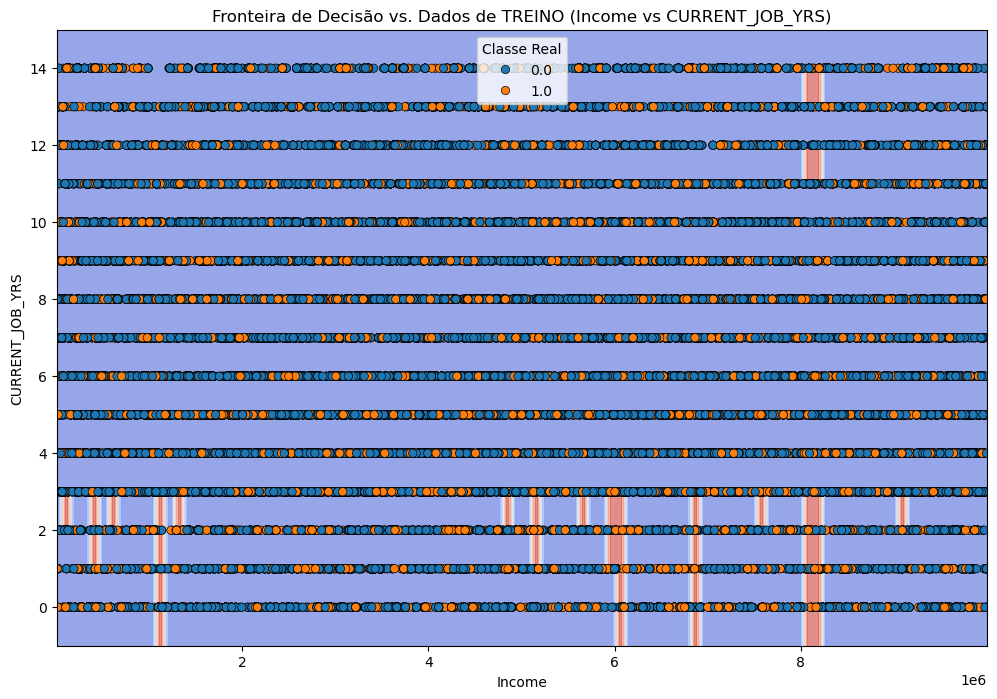

In [102]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.title(f"Fronteira de Decisão vs. Dados de TREINO ({feature1} vs {feature2})")

DecisionBoundaryDisplay.from_estimator(
    modelo_simples,
    X[[feature1,feature2]], # <-- CORREÇÃO AQUI: Use o DataFrame com apenas 2 features
    ax=ax,
    response_method="predict",
    cmap="coolwarm",
    alpha=0.6,
    xlabel=feature1,
    ylabel=feature2
)
sns.scatterplot(
    x=X[feature1],
    y=X[feature2],
    hue=y_train, # <-- CORREÇÃO AQUI: Use os rótulos de treino
    ax=ax,
    edgecolor="k"
)
plt.legend(title="Classe Real")
plt.show()


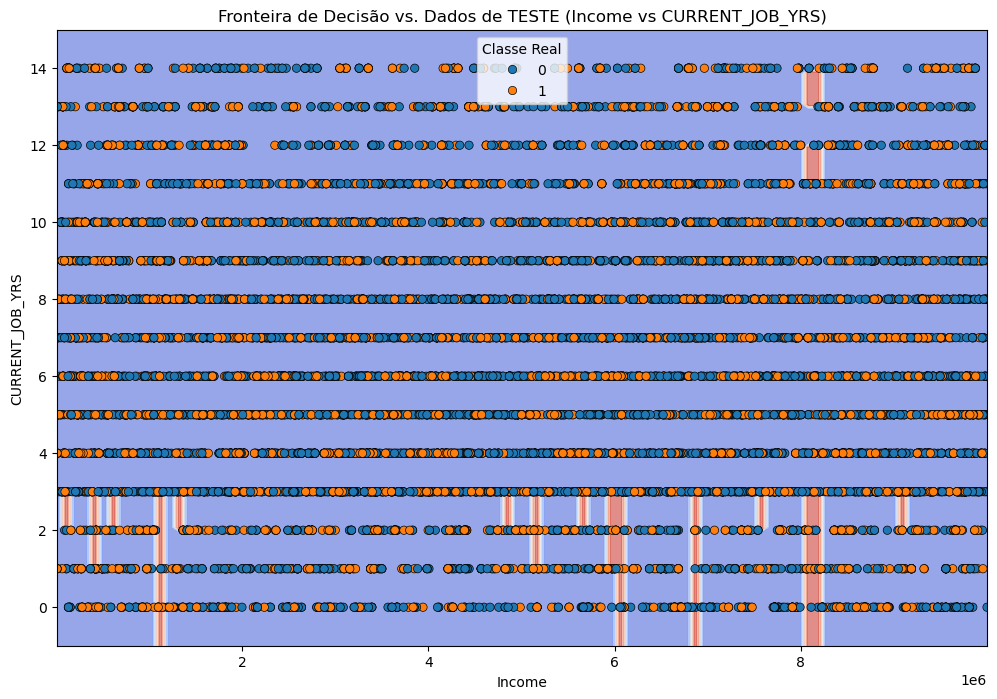

In [103]:
# =========================================================
# GRÁFICO 2: VISUALIZAÇÃO COM DADOS DE TESTE (CORRIGIDO)
# =========================================================
fig, ax = plt.subplots(figsize=(12, 8))
plt.title(f"Fronteira de Decisão vs. Dados de TESTE ({feature1} vs {feature2})")

DecisionBoundaryDisplay.from_estimator(
    modelo_simples,
    X_test[[feature1,feature2]], # <-- Use o DataFrame de teste com apenas 2 features
    ax=ax,
    response_method="predict",
    cmap="coolwarm",
    alpha=0.6,
    xlabel=feature1,
    ylabel=feature2
)
sns.scatterplot(
    x=X_test[feature1],
    y=X_test[feature2],
    hue=y_test, # Use os rótulos de teste
    ax=ax,
    edgecolor="k"
)
plt.legend(title="Classe Real")
plt.show()